# Importing libraries

In [37]:

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
warnings.simplefilter(action="ignore", category=FutureWarning)

# Importing the first dataset

In [57]:

df1 = pd.read_csv('data/GlobalLandTemperaturesByCountry.csv', parse_dates=['dt'])
df1.set_index('dt', inplace=True)
df1.head()

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1743-11-01,4.384,2.294,Åland
1743-12-01,NaN,NaN,Åland
1744-01-01,NaN,NaN,Åland
1744-02-01,NaN,NaN,Åland
1744-03-01,NaN,NaN,Åland


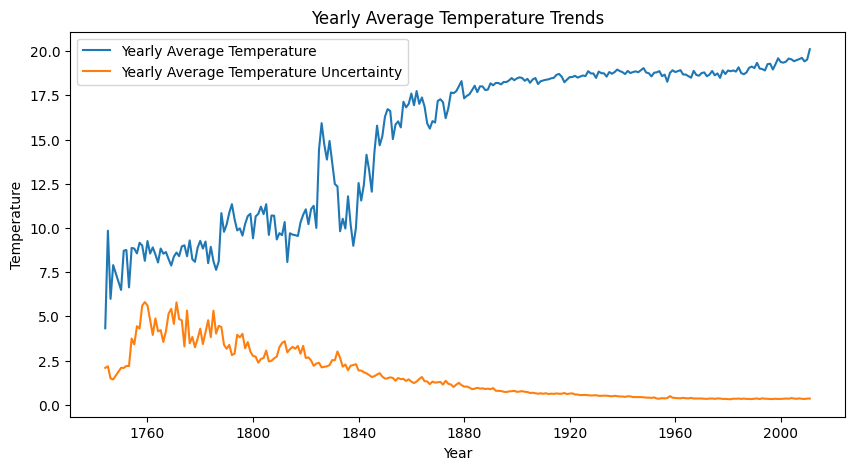

In [61]:
#Vis

# Select only the numeric columns for resampling
numeric_df1 = df1.select_dtypes(include=[np.number])

# Resample the data yearly and calculate the mean
df1_yearly = numeric_df1.resample("Y").mean()

# Plot the yearly data
plt.figure(figsize=(10, 5))
plt.plot(df1_yearly.index, df1_yearly["AverageTemperature"], label="Yearly Average Temperature")
plt.plot(df1_yearly.index, df1_yearly["AverageTemperatureUncertainty"], label="Yearly Average Temperature Uncertainty")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.title("Yearly Average Temperature Trends")
plt.legend()
plt.show()

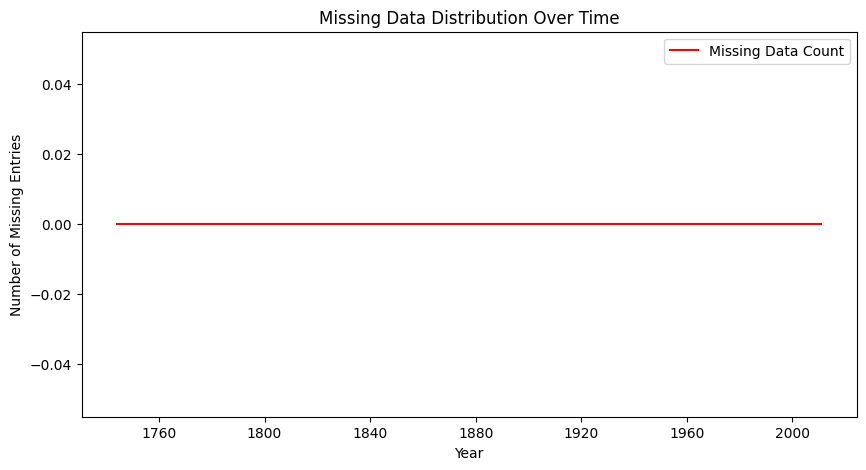

In [63]:
# Add a column to mark missing values
df1["missing"] = df1["AverageTemperature"].isnull()

# Resample to yearly and sum the missing counts
missing_yearly = df1["missing"].resample("Y").sum()

# Plot the missing data
plt.figure(figsize=(10, 5))
plt.plot(missing_yearly.index, missing_yearly, label="Missing Data Count", color="red")
plt.xlabel("Year")
plt.ylabel("Number of Missing Entries")
plt.title("Missing Data Distribution Over Time")
plt.legend()
plt.show()


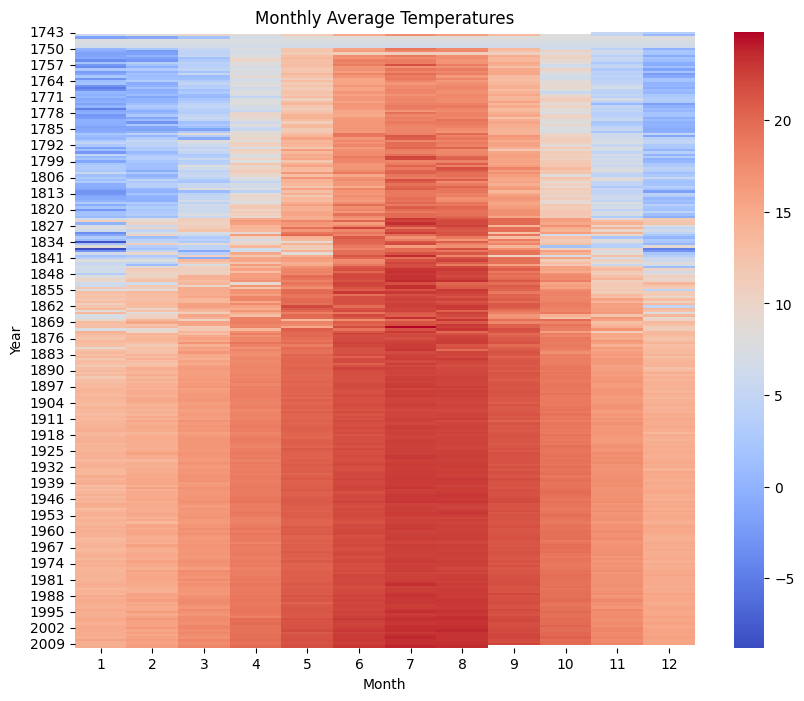

In [59]:
# Extract year and month from the datetime index
df1['year'] = df1.index.year
df1['month'] = df1.index.month

# Pivot table to show monthly averages
monthly_avg = df1.pivot_table(values='AverageTemperature', index='year', columns='month', aggfunc='mean')

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(monthly_avg, cmap='coolwarm', annot=False, cbar=True)
plt.title('Monthly Average Temperatures')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [60]:
df1['AverageTemperature'] = df1['AverageTemperature'].interpolate(method='time')
df1['AverageTemperatureUncertainty'] = df1['AverageTemperatureUncertainty'].interpolate(method='time')

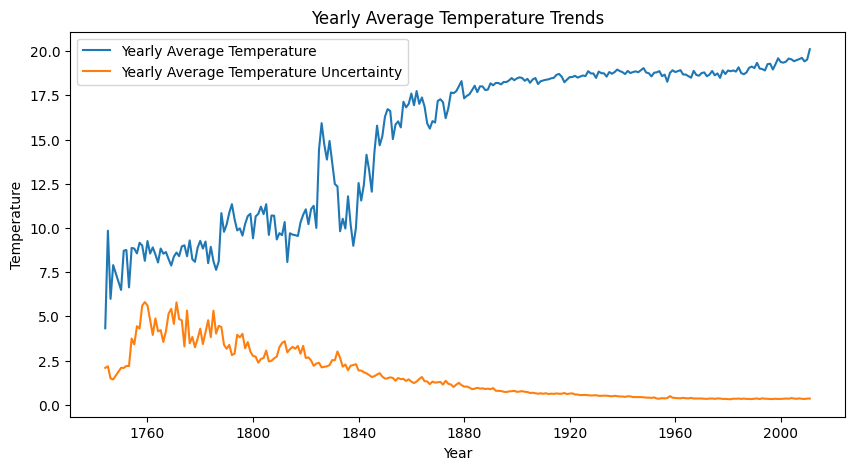

In [62]:
# Select only the numeric columns for resampling
numeric_df1 = df1.select_dtypes(include=[np.number])

# Resample the data yearly and calculate the mean
df1_yearly = numeric_df1.resample("Y").mean()

# Plot the yearly data
plt.figure(figsize=(10, 5))
plt.plot(df1_yearly.index, df1_yearly["AverageTemperature"], label="Yearly Average Temperature")
plt.plot(df1_yearly.index, df1_yearly["AverageTemperatureUncertainty"], label="Yearly Average Temperature Uncertainty")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.title("Yearly Average Temperature Trends")
plt.legend()
plt.show()

In [64]:
#Importing the Second dataset
df2 = pd.read_csv('data/GlobalLandTemperaturesByState.csv', parse_dates=['dt'])
df2.set_index('dt', inplace=True)
df2.head()

,AverageTemperature,AverageTemperatureUncertainty,State,Country
dt,,,,
1855-05-01,25.544,1.171,Acre,Brazil
1855-06-01,24.228,1.103,Acre,Brazil
1855-07-01,24.371,1.044,Acre,Brazil
1855-08-01,25.427,1.073,Acre,Brazil
1855-09-01,25.675,1.014,Acre,Brazil


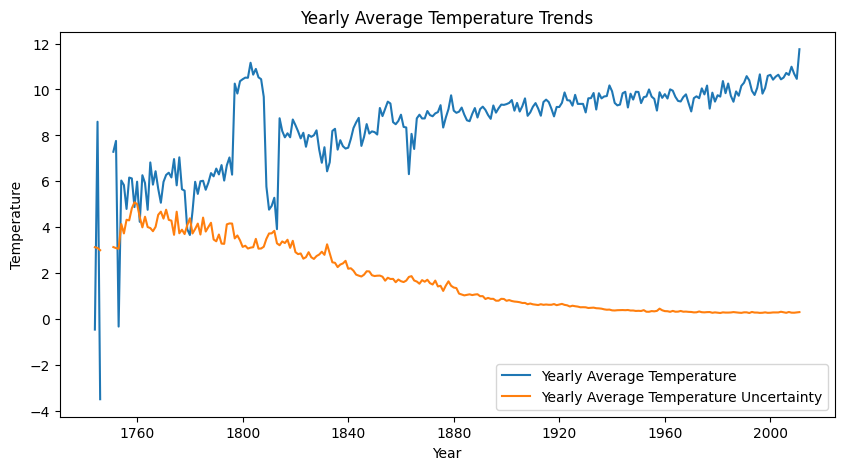

In [65]:
numeric_df2 = df2.select_dtypes(include=[np.number])

# Resample the data yearly and calculate the mean
df2_yearly = numeric_df2.resample("Y").mean()

# Plot the yearly data
plt.figure(figsize=(10, 5))
plt.plot(df2_yearly.index, df2_yearly["AverageTemperature"], label="Yearly Average Temperature")
plt.plot(df2_yearly.index, df2_yearly["AverageTemperatureUncertainty"], label="Yearly Average Temperature Uncertainty")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.title("Yearly Average Temperature Trends")
plt.legend()
plt.show()

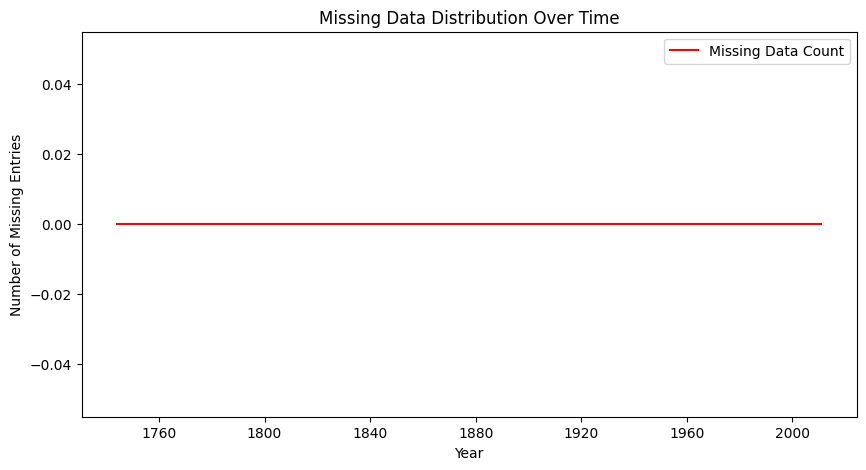

In [73]:
df2["missing"] = df2["AverageTemperature"].isnull()

# Resample to yearly and sum the missing counts
missing_yearly = df2["missing"].resample("Y").sum()

# Plot the missing data
plt.figure(figsize=(10, 5))
plt.plot(missing_yearly.index, missing_yearly, label="Missing Data Count", color="red")
plt.xlabel("Year")
plt.ylabel("Number of Missing Entries")
plt.title("Missing Data Distribution Over Time")
plt.legend()
plt.show()


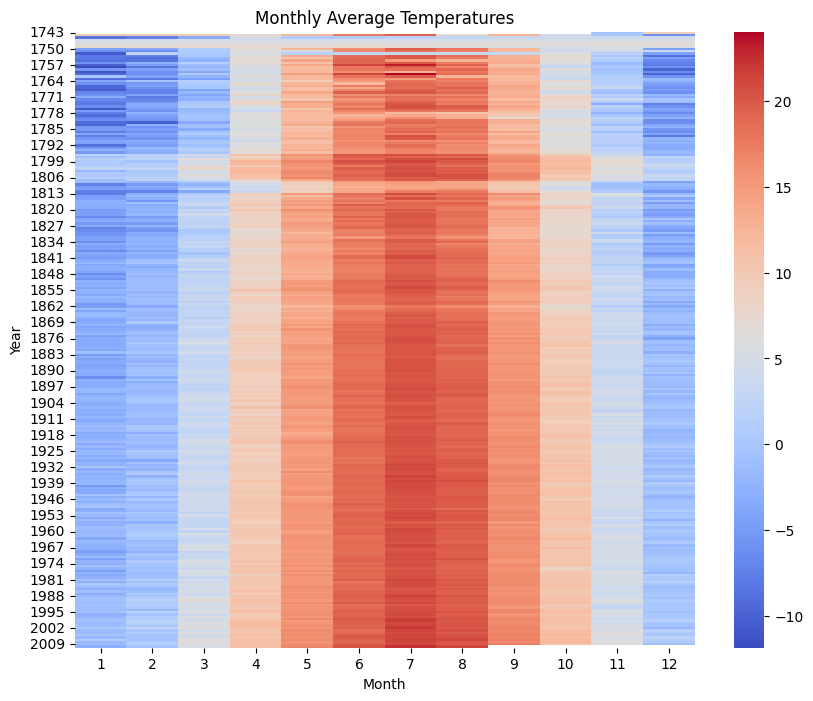

In [72]:
# Extract year and month from the datetime index
df2['year'] = df2.index.year
df2['month'] = df2.index.month

# Pivot table to show monthly averages
monthly_avg = df2.pivot_table(values='AverageTemperature', index='year', columns='month', aggfunc='mean')

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(monthly_avg, cmap='coolwarm', annot=False, cbar=True)
plt.title('Monthly Average Temperatures')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [71]:
data_interpolated = df2.interpolate(method='time')
decomposition = seasonal_decompose(data_interpolated['AverageTemperature'], model='additive', period=12)
df2['AverageTemperature'] = df2['AverageTemperature'].fillna(decomposition.trend + decomposition.seasonal)

In [27]:
df3 = pd.read_csv('data/GlobalTemperatures.csv', parse_dates=['dt'])
df3.set_index('dt', inplace=True)
df3.head()

,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,LandAverageTemperature
dt,,,,,,,,
1750-01-01,3.574,NaN,NaN,NaN,NaN,NaN,NaN,3.034
1750-02-01,3.702,NaN,NaN,NaN,NaN,NaN,NaN,3.083
1750-03-01,3.076,NaN,NaN,NaN,NaN,NaN,NaN,5.626
1750-04-01,2.451,NaN,NaN,NaN,NaN,NaN,NaN,8.490
1750-05-01,2.072,NaN,NaN,NaN,NaN,NaN,NaN,11.573


<Axes: >

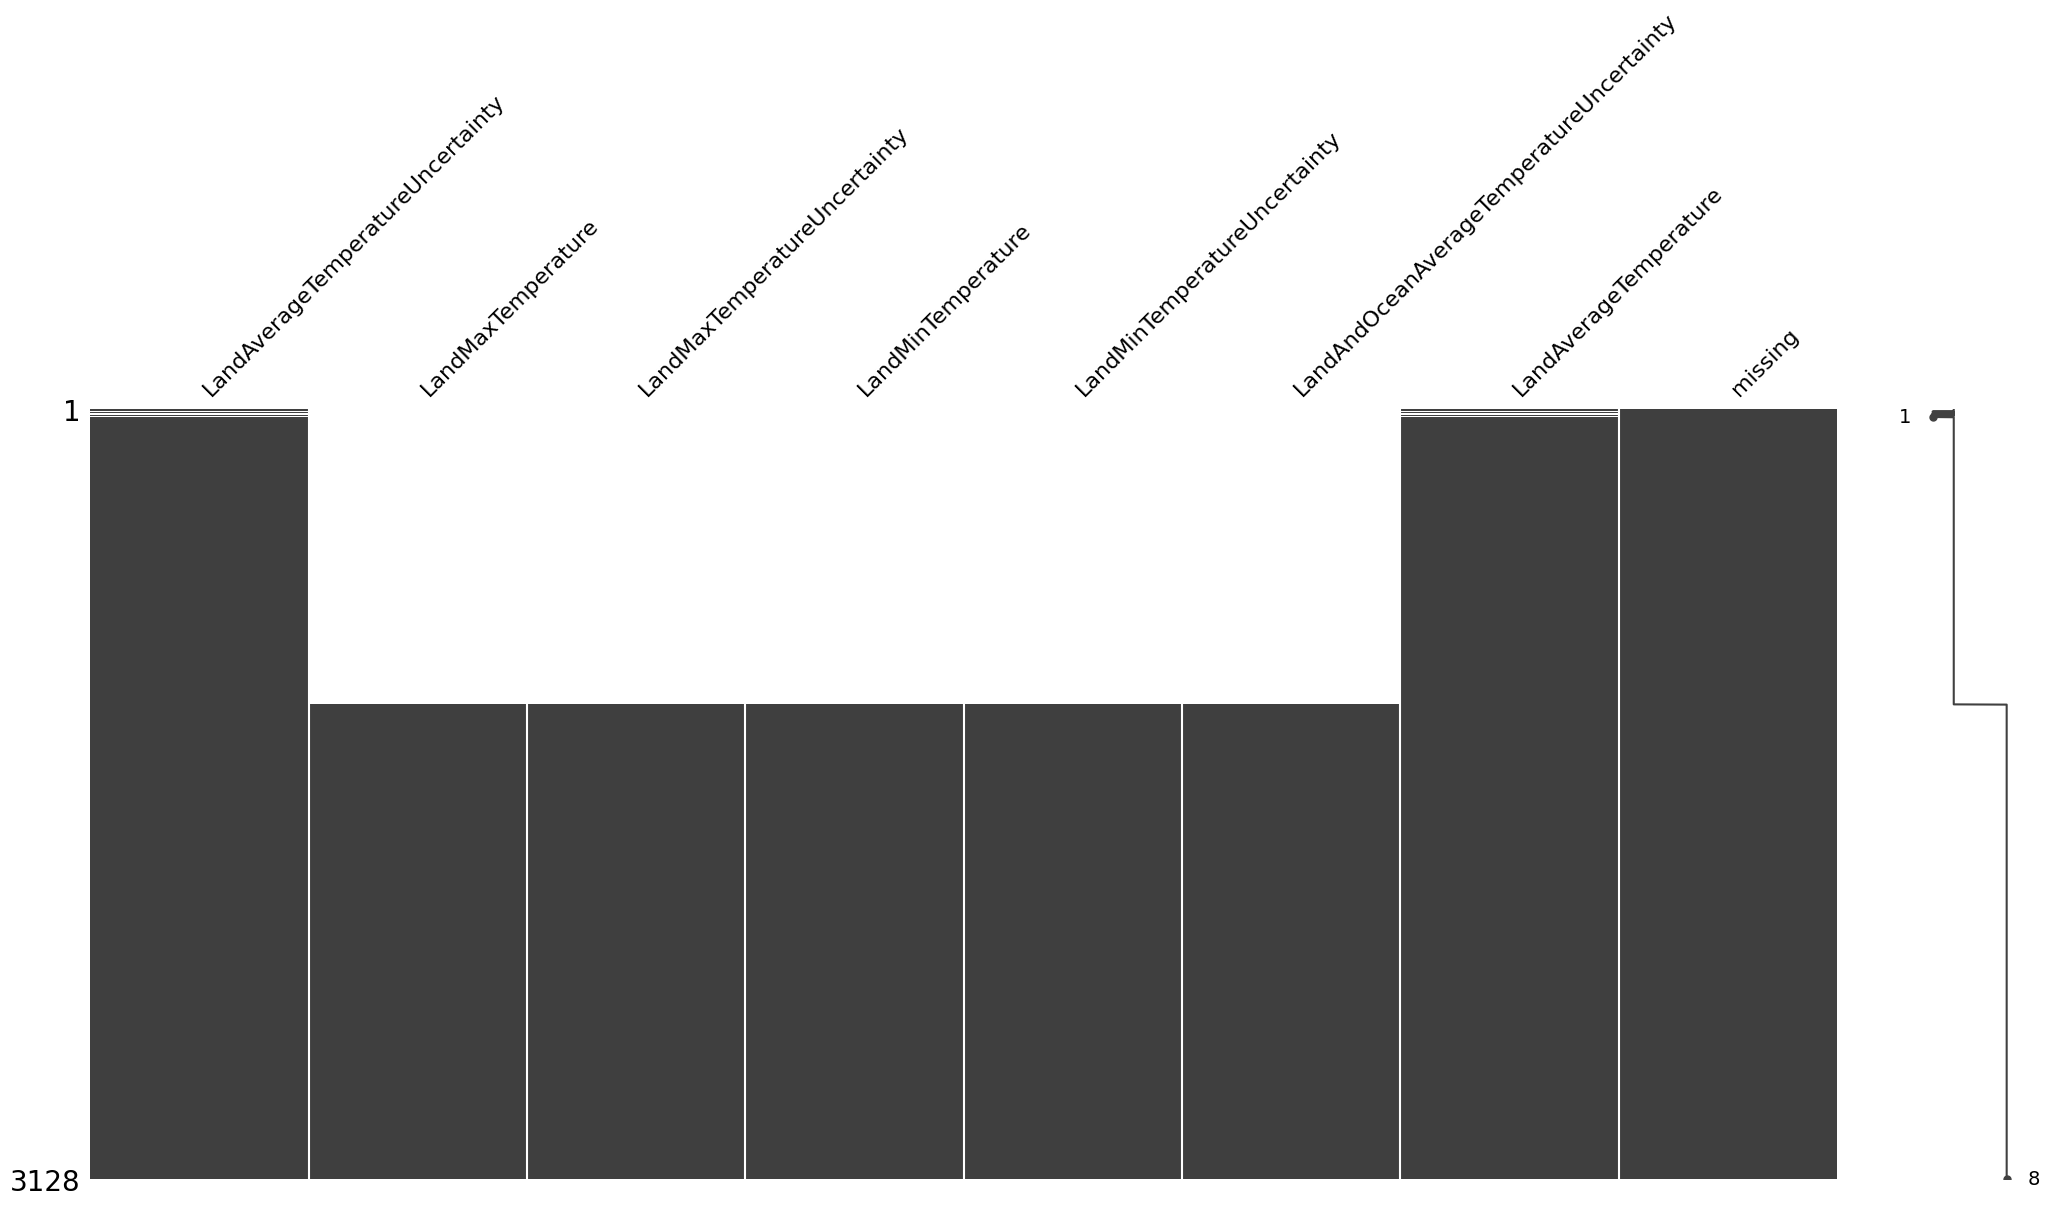

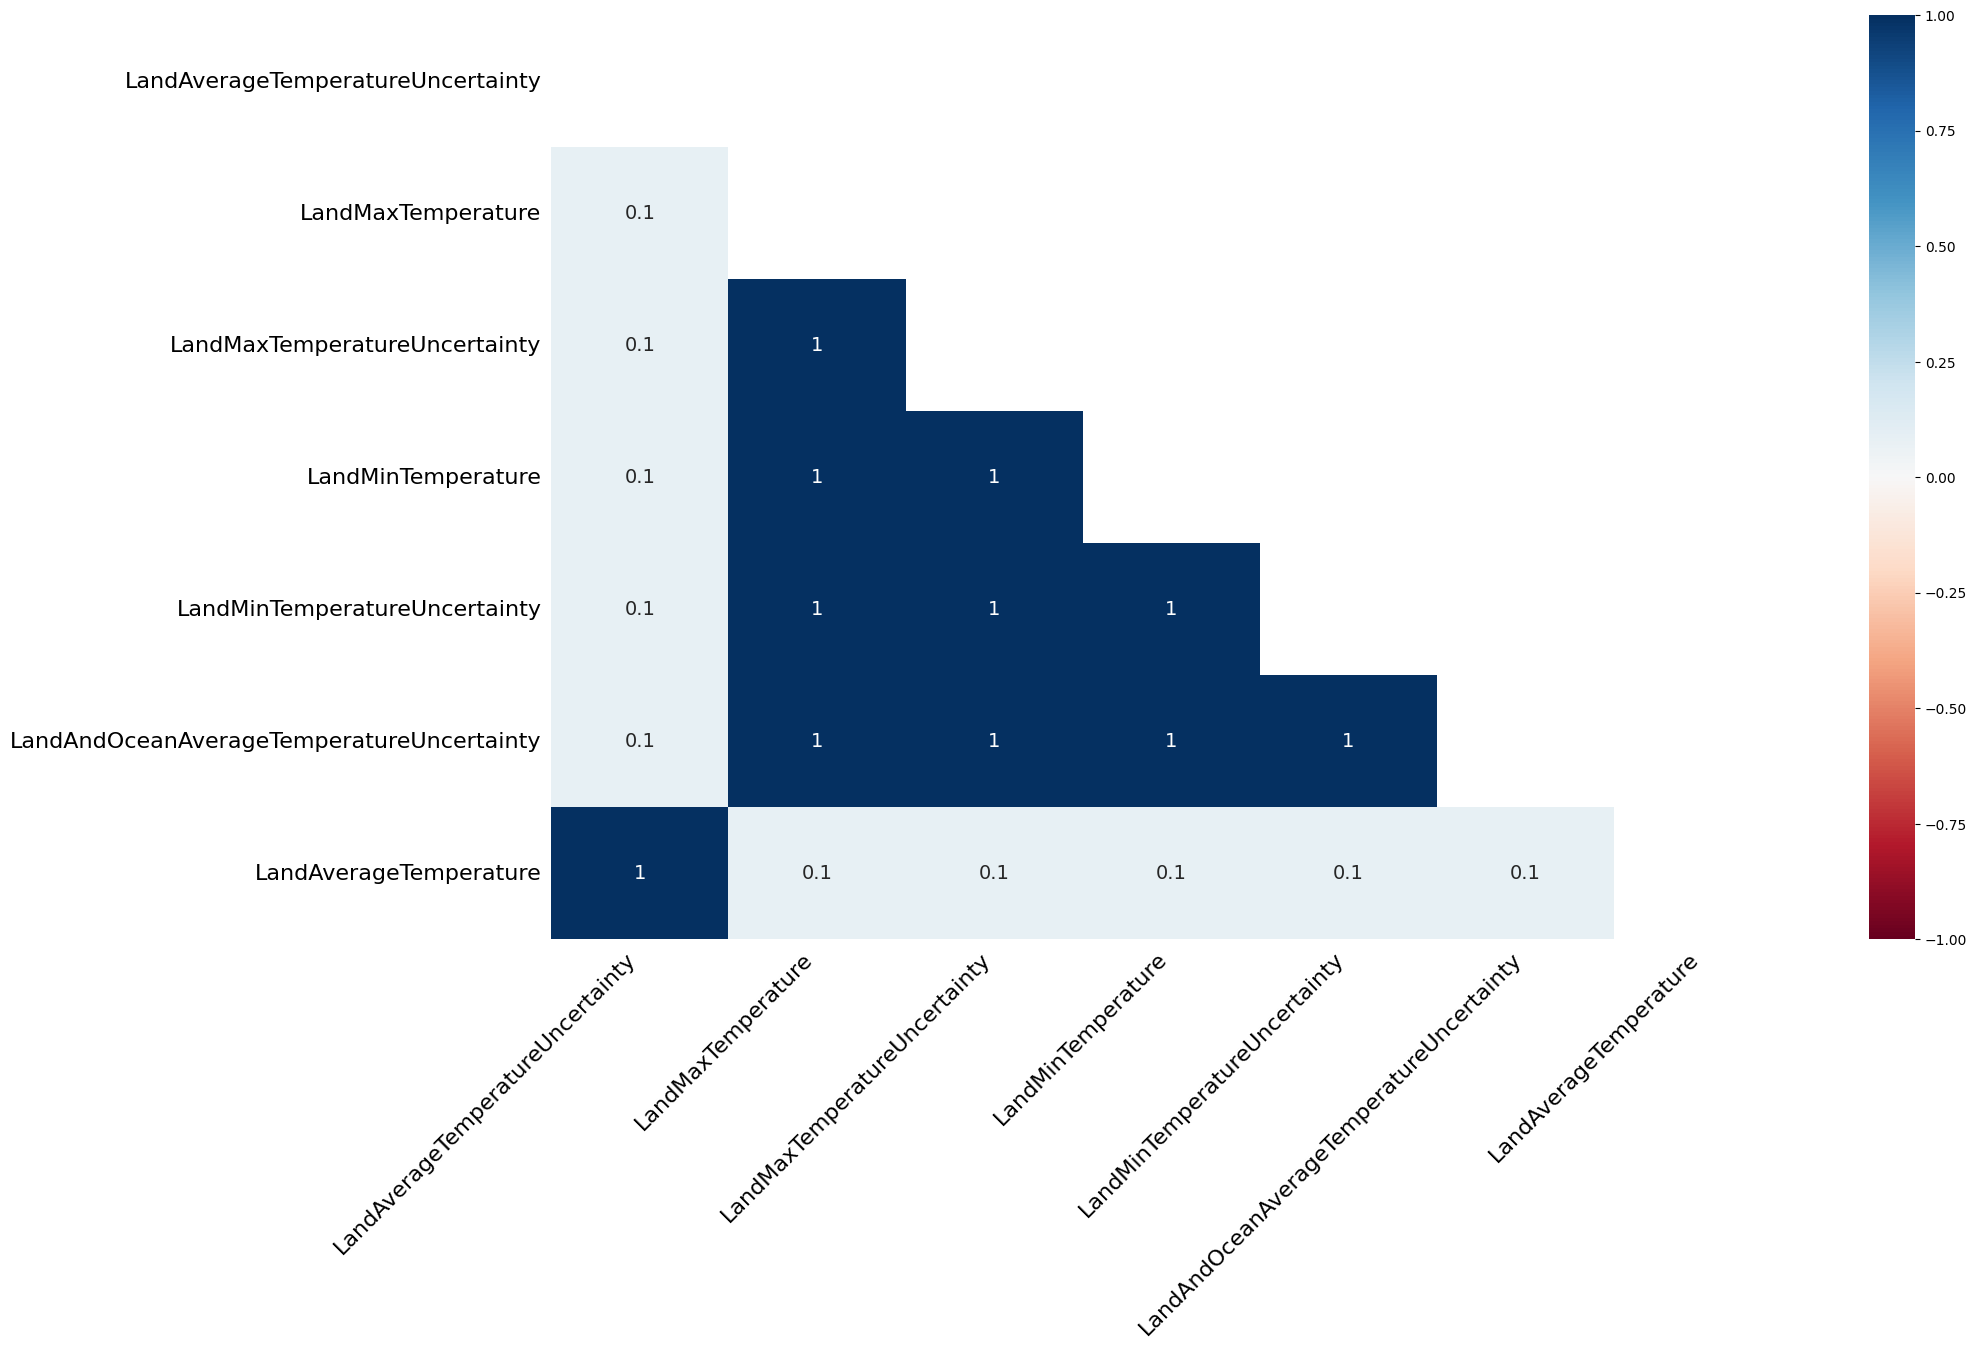

In [75]:
import missingno as msno
msno.matrix(df3)
msno.heatmap(df3) 

In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3128 entries, 1750-01-01 to 2010-08-01
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   LandAverageTemperatureUncertainty          3116 non-null   float64
 1   LandMaxTemperature                         1928 non-null   float64
 2   LandMaxTemperatureUncertainty              1928 non-null   float64
 3   LandMinTemperature                         1928 non-null   float64
 4   LandMinTemperatureUncertainty              1928 non-null   float64
 5   LandAndOceanAverageTemperature             1928 non-null   float64
 6   LandAndOceanAverageTemperatureUncertainty  1928 non-null   float64
 7   LandAverageTemperature                     3116 non-null   float64
dtypes: float64(8)
memory usage: 219.9 KB


In [30]:
df3.drop(columns=["LandAndOceanAverageTemperature"], inplace=True)

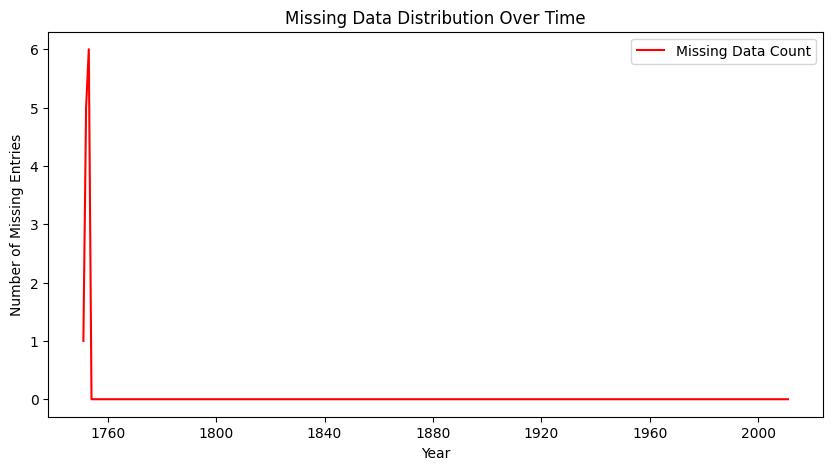

In [36]:
df3["missing"] = df3["LandAverageTemperature"].isnull()

# Resample to yearly and sum the missing counts
missing_yearly = df3["missing"].resample("Y").sum()

# Plot the missing data
plt.figure(figsize=(10, 5))
plt.plot(missing_yearly.index, missing_yearly, label="Missing Data Count", color="red")
plt.xlabel("Year")
plt.ylabel("Number of Missing Entries")
plt.title("Missing Data Distribution Over Time")
plt.legend()
plt.show()


In [ ]:
df3.interpolate(inplace=True)